# Masterthesis
## Explaining Boosting Machine

**Imports and Definitions**
- The necessary libraries are loaded here and important variables are defined

**Imports and settings for this script**
- Import libraries and set variables for this script

**Create plots for explainable boosting machine**
- EBM Result files are loaded to create box plots

**Create Plot for EBM Summary**

**Function for EBM**
- This function load and fit the EBM model

**Explainable Machine Learing with EBM**
- This main loop call for each scenario the EBM function


## Imports and Definitions

In [19]:
# Import sklearn
import sklearn

# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# To calculate amplitude and phase
import math

# Measure runtime of a jupyter jotebook code cell
from timeit import default_timer as timer

# Used to check if file exists
import os

# Used to check if directory exists
import pathlib

# Import Operation System Calls
import SubOperationSystem

# check os
if os.name == 'nt':
    print("OS is Windows")
    Delimiter = '\\'
    
else:
    print("OS is Linux")
    Delimiter = '/'
    
# Path of datasets (root directory)
PathDataset = 'Dataset' + Delimiter    

# Path of datasets
PathDatasetSub = PathDataset + 'CsiFilesRah' + Delimiter
        
# Path of the converted files
PathConverted = PathDataset + 'Converted' + Delimiter

# Set path for scenario files
PathScenario = PathDataset + 'Scenario' + Delimiter

# Set path for scenario files
PathResult = PathDataset + 'Result' + Delimiter

# Set path for scenario files
PathPlot = PathDataset + 'Plot' + Delimiter

# Set path for scenario files
PathConfig = 'FilesConfig' + Delimiter

# Scenariofile (file with info about the ten scenarios)
FileScenario = 'FileScenario.csv'

# Mappingfile (file with info about original and converted filenames)
FileMapping = 'FileMapping.csv'

OS is Windows


## Imports and settings for this script

In [20]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Import EBM
from interpret.glassbox import ExplainableBoostingClassifier

# Import show
from interpret import show

## Create plots for explainable boosting machine

This script read the EBM result files and create the plots to save it as png file.

Following files are needed

* Scenario file - this file contrains the scenarios
* Mapping file - with mapping between the number and the name of the dataset
* Algorithm file - as a list of the used algrithm (only EBM)
* (*).acc file - with the ML results
* The results are saved in 'PathPlot'


In [21]:
# Import mathplot
import matplotlib.pyplot as plt

# Set file for algorithm
FileAlgorithm = 'FileAlgorithmEbm.csv'

# Path where the result read
PathResult = PathResult + 'ResultEbm' + Delimiter

# Set Label
Label = '_ebm'

   LineNumber Algorithm        DisplayNameAlgorithm
0           1       EBM  Explainable Boosting Model


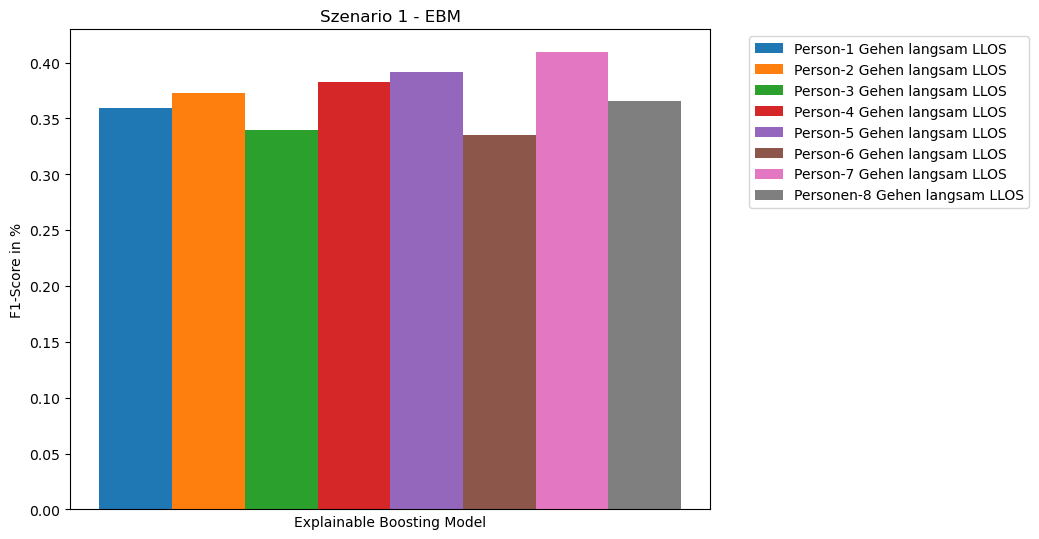

   LineNumber Algorithm        DisplayNameAlgorithm
0           1       EBM  Explainable Boosting Model


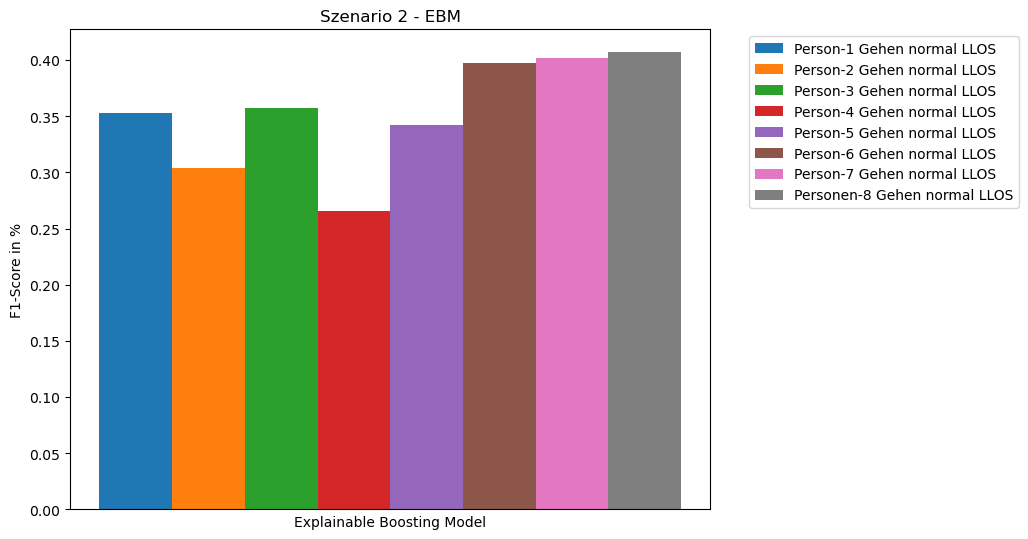

   LineNumber Algorithm        DisplayNameAlgorithm
0           1       EBM  Explainable Boosting Model


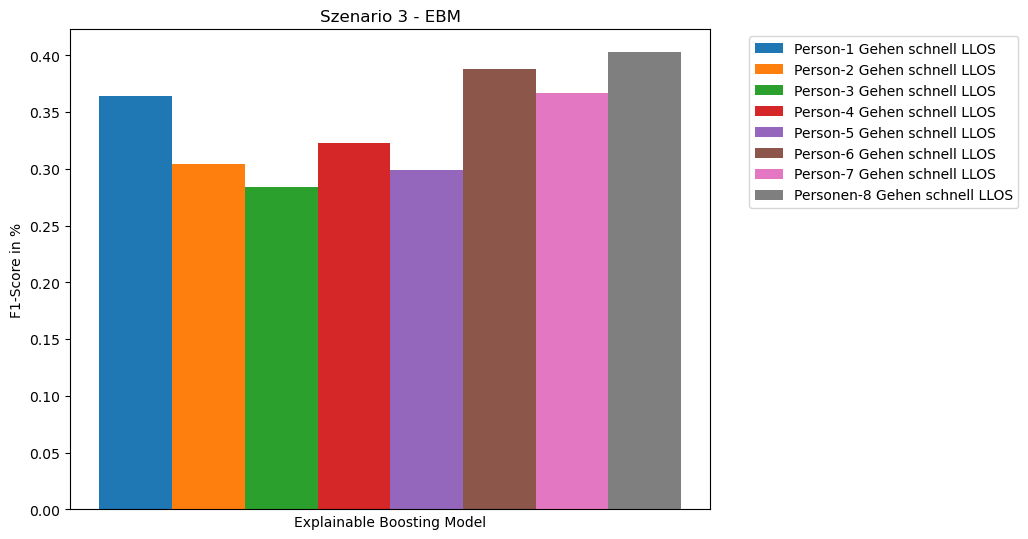

   LineNumber Algorithm        DisplayNameAlgorithm
0           1       EBM  Explainable Boosting Model


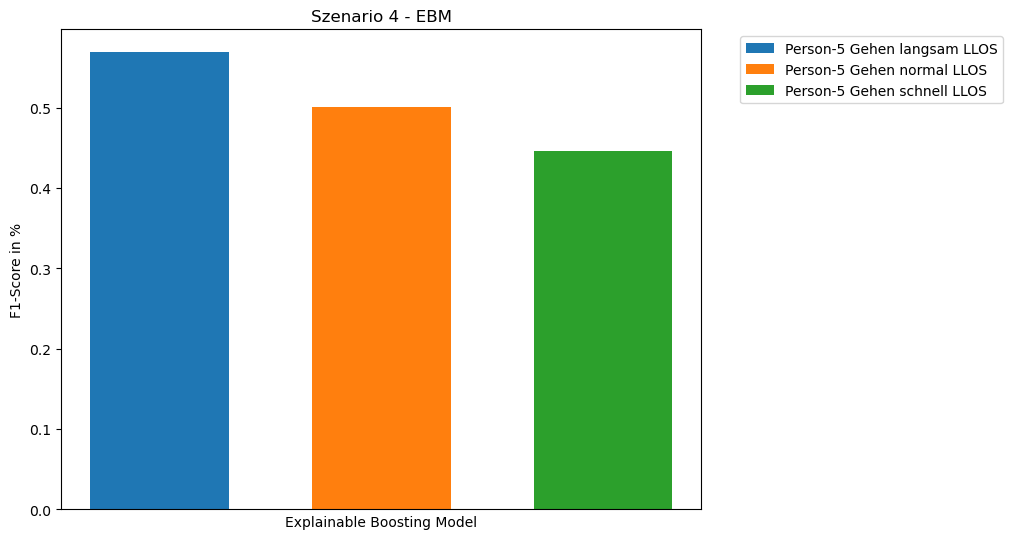

   LineNumber Algorithm        DisplayNameAlgorithm
0           1       EBM  Explainable Boosting Model


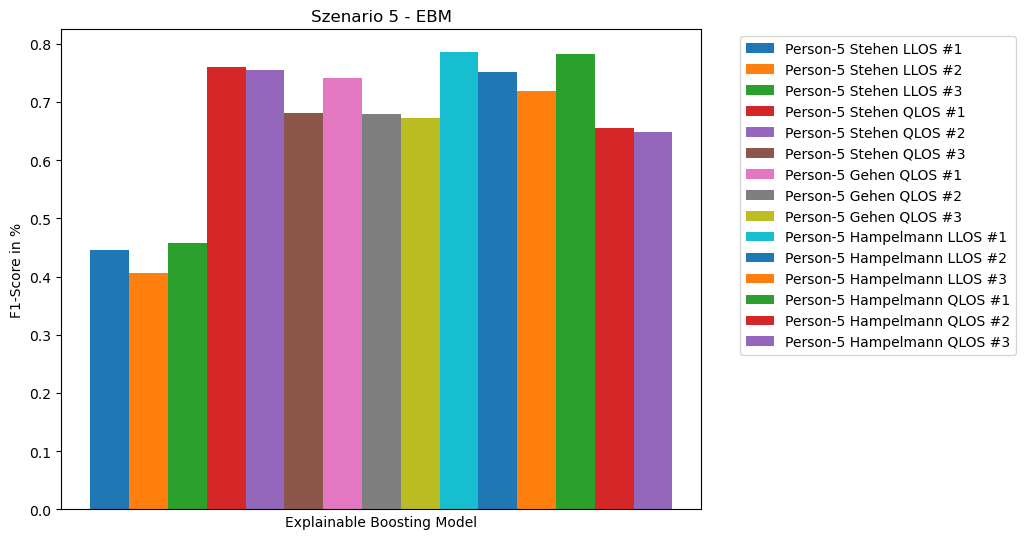

   LineNumber Algorithm        DisplayNameAlgorithm
0           1       EBM  Explainable Boosting Model


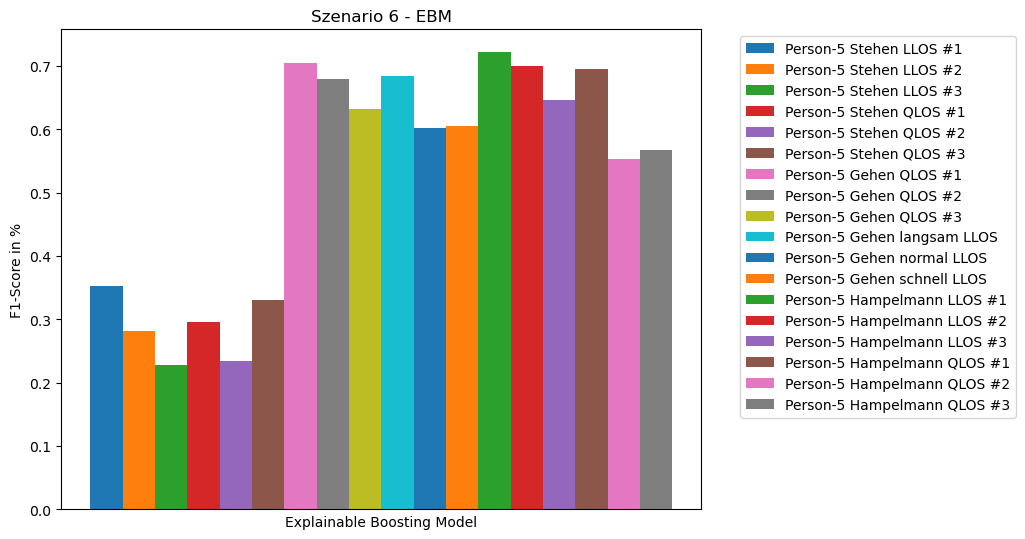

   LineNumber Algorithm        DisplayNameAlgorithm
0           1       EBM  Explainable Boosting Model


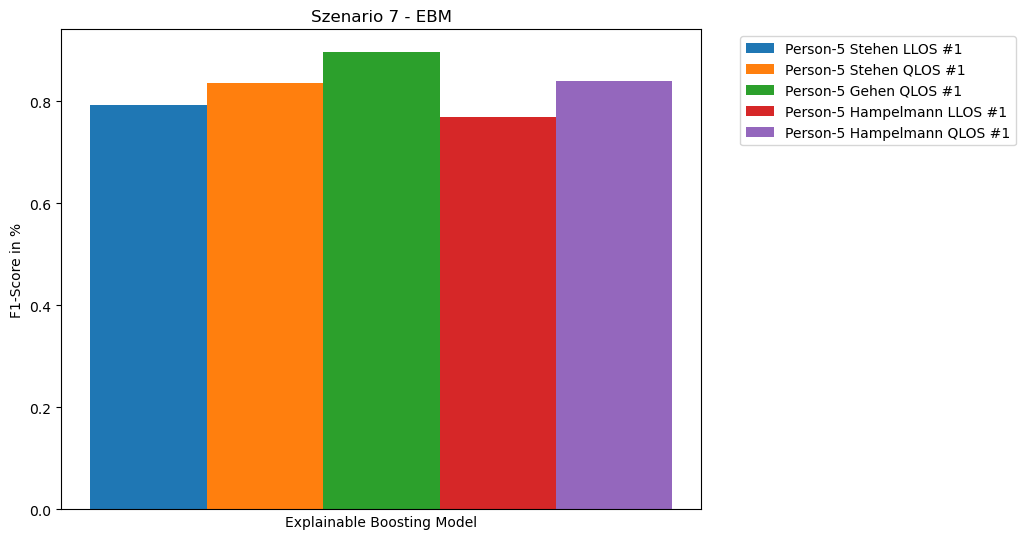

   LineNumber Algorithm        DisplayNameAlgorithm
0           1       EBM  Explainable Boosting Model


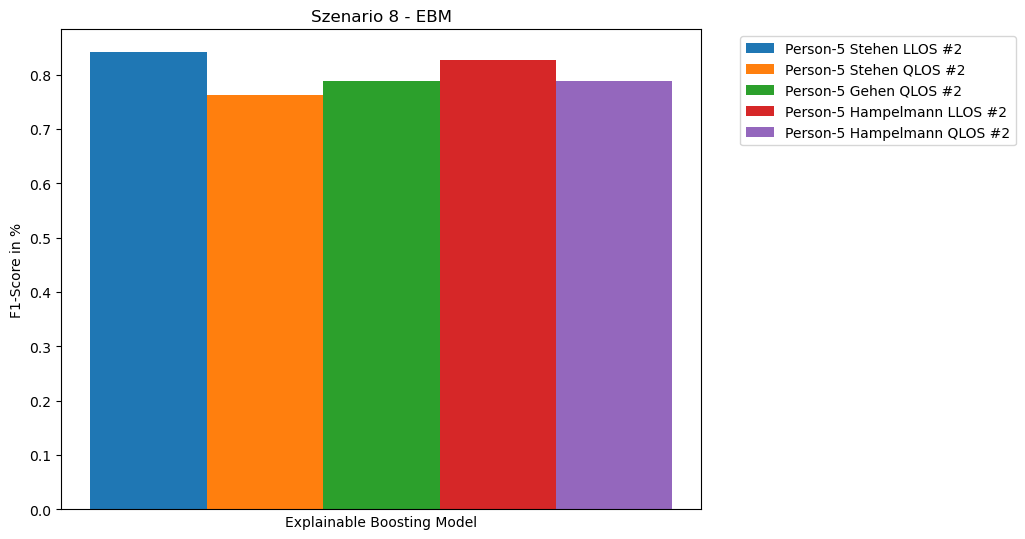

   LineNumber Algorithm        DisplayNameAlgorithm
0           1       EBM  Explainable Boosting Model


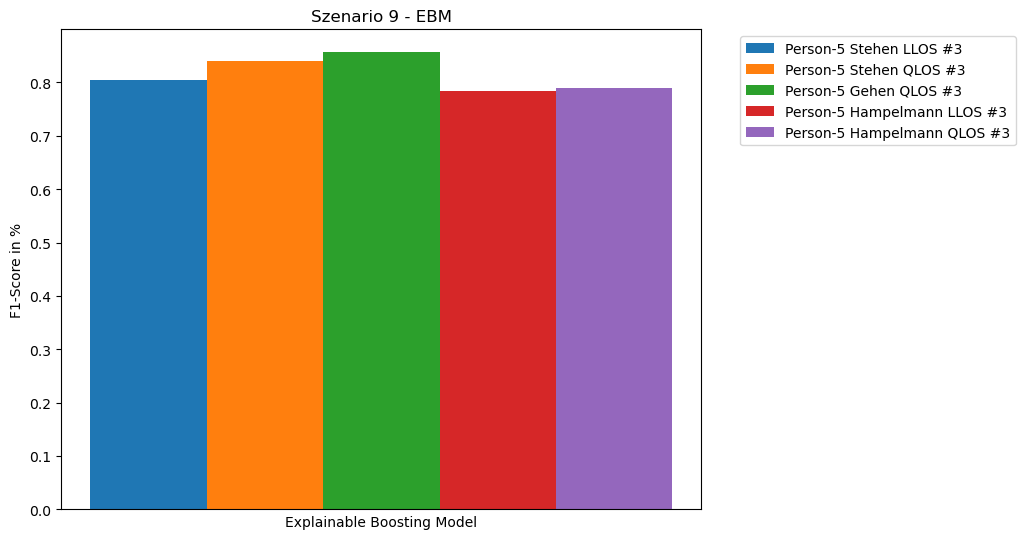

   LineNumber Algorithm        DisplayNameAlgorithm
0           1       EBM  Explainable Boosting Model


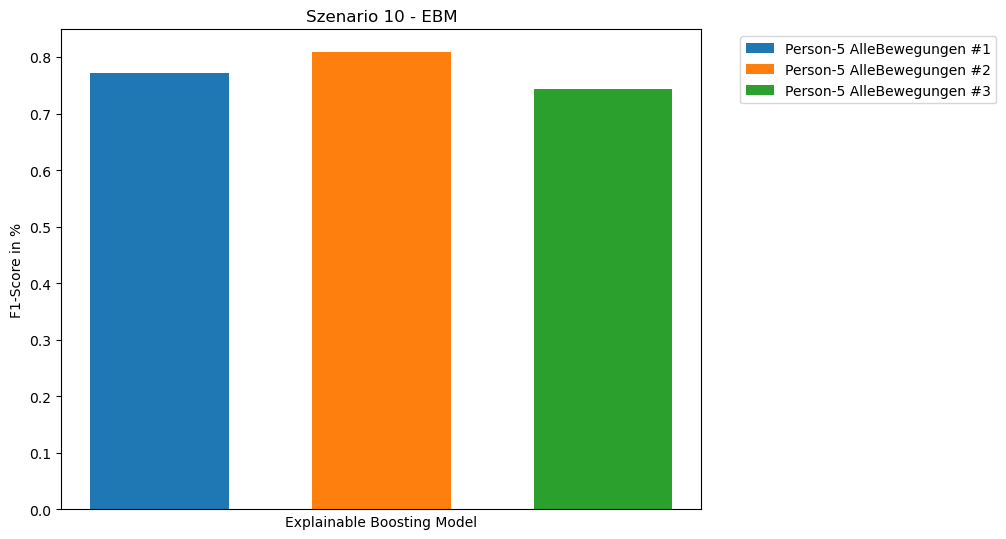

In [23]:
# Open scenario mapping file to read
dfScenario = pd.read_csv(PathConfig + FileScenario)

# Loop through scenario dataframe to get movements
for ind in dfScenario.index:

    # Create an empty lists
    DataToPlot = []
    ScenarienCounter = []
    listAlgorithmDisplayName = []
    listMovementDisplayName = []
    
    # Get scenarios and dataset from dataframe
    Scenario,Datasets = (dfScenario['Scenario'][ind], dfScenario['Datasets'][ind])
    
    # Get values of movements
    DatasetItems=list(Datasets.split())
    
    # Read Filemapping file. This file contains the name for Movements
    dfFileMapping = pd.read_csv(PathConfig + FileMapping, names=['LineNumber','FilenameOld','FilenameNew'], skiprows=1)
        
    # Loop through DatasetItems
    for DatasetItem in DatasetItems:
            
        # Loop through mapping dataframe to get number of movments
        for ind in dfFileMapping.index:
    
            # Get scenarios and dataset from dataframe
            LineNumber,FilenameNew = (dfFileMapping['LineNumber'][ind], dfFileMapping['FilenameNew'][ind])
        
            # Test if Scenario equal ScenarioName
            if int(DatasetItem) == LineNumber:
                
                # clean up
                FilenameNew = FilenameNew.replace(".csv","")
                FilenameNew = FilenameNew.replace("_"," ")
                
                # append to list
                listMovementDisplayName.append(FilenameNew)
    
    # Read algorithm file to get count of used algorithm an name of algorithm
    dfAlgorithm = pd.read_csv(PathConfig + FileAlgorithm, names=['LineNumber','Algorithm','DisplayNameAlgorithm'], skiprows=1)
    
    # Get algorithmn display name
    listAlgorithmDisplayName = dfAlgorithm['DisplayNameAlgorithm'].tolist()
    
    # insert a null value to list, needed for plot
    listAlgorithmDisplayName.insert(0, "")
    
    # Loop through algorithm
    for Algorithm in dfAlgorithm.index:
    
        # Read txt file which is formatted as a csv into a dataframe and name cols
        dfResults = pd.read_csv(PathResult + Scenario + "_" + dfAlgorithm['Algorithm'][Algorithm] + ".acc",names=['label','value'], skiprows=1)
    
        # Convert value to list
        listScenario = dfResults['value'].tolist()
        
        # Add to list
        DataToPlot.append(listScenario)
        
    # Transporniere the list
    DataToPlot = list(map(list, zip(*DataToPlot)))
    
    # Count groups (= Algorithm)
    CounterAlgorithm = np.arange(len(dfAlgorithm))
    
    # Create plot
    fig, ax = plt.subplots()
   
    # Add subplots
    ax = fig.add_axes([0,0,1,1])
  
    # Create bar depend on the List of the List
    for bar in range(len(DataToPlot)):

        # We need other settings if plots have more then 14 bars
        if len(DataToPlot) == 3:
            widthBar = 0.0025
            spaceBar = 250

        elif len(DataToPlot) == 5:
            widthBar = 0.1
            spaceBar = 10

        elif len(DataToPlot) == 8:
            widthBar = 0.1
            spaceBar = 10
        
        elif len(DataToPlot) == 15:
            widthBar = 0.1
            spaceBar = 10
        
        else:
            widthBar = 0.05
            spaceBar = 20
            
        # Create bars
        ax.bar(CounterAlgorithm + (bar/spaceBar), DataToPlot[bar], width = widthBar)

    # Set legend
    ax.legend(listMovementDisplayName, bbox_to_anchor=(1.05, 1), loc='upper left' )
    
    # Set titlename
    # PlotScenarioName = Scenario if not Pca else Scenario + ' - With PCA'
    PlotScenarioName = Scenario
        
    # Set scenario name for title
    PlotScenarioName = PlotScenarioName.replace("Scenario","Szenario")
    PlotScenarioName = PlotScenarioName.replace("10","xx")
    PlotScenarioName = PlotScenarioName.replace("0"," ")
    PlotScenarioName = PlotScenarioName.replace("xx"," 10")
    
    # Set 
    ax.set(title=PlotScenarioName + ' - EBM', ylabel='F1-Score in %', xlabel=listAlgorithmDisplayName[1])
    
    # Set Parameter for plot
    plt.tick_params(
        
        # Changes apply to the x-axis
        axis='x',
        
        # Both major and minor ticks are affected
        which='both',
        
        # Ticks along the bottom edge are off
        bottom=False,
        
        # Ticks along the top edge are off
        top=False,
        
        # labels along the bottom edge are off
        labelbottom=False)
    
    # Create plot
    plt.savefig(PathPlot + Scenario + Label, dpi=300, bbox_inches = 'tight')
        
    # Show plot
    plt.show();

## Create Plot for EBM Summary

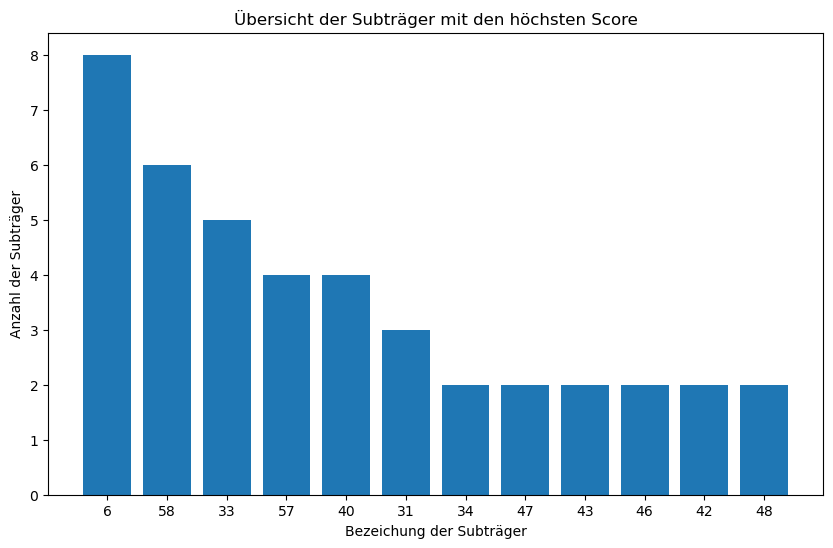

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Data to plot
X = np.array(["6","58","33","57","40","31","34","47","43","46","42","47","48"])
y = np.array([8,6,5,4,4,3,2,2,2,2,2,2,2])

# Create plots
plt.figure(figsize=(10, 6))
plt.bar(X,y)
plt.xlabel('Bezeichung der Subträger')
plt.ylabel('Anzahl der Subträger')
plt.title('Übersicht der Subträger mit den höchsten Score')
plt.savefig(PathPlot + 'SummaryPlotSubcarrierEbm.png')
plt.show()

## Function for EBM

In [17]:
# Function for load and fit model (ebm)
def trainEbmClassifier(Scenario):

    # Read scenario file
    df = pd.read_csv(PathScenario + Scenario + '_ah.csv')
    
    # Get features and label
    X = df.drop("label", axis=1)
    y = df['label']
    
    # Set seed (random)
    seed = 42
    
    # Split in train- and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)
    
    # Init ebm classifier 
    ebm = ExplainableBoostingClassifier(n_jobs=-1, interactions=0)
    
    # fit model
    ebm.fit(X_train, y_train)
    
    # Return trained model and testdata
    return ebm, X_test, y_test

## Explainable Machine Learing with EBM

In [ ]:
%%time

# Read scenario mapping file
dfScenario = pd.read_csv(PathConfig + FileScenario, sep=',')

# Loop through scenario file
for ind in dfScenario.index:
    
    # Get filename of scenario
    Scenario = (dfScenario['Scenario'][ind])

    # Print scenario name
    print('Scenario:',Scenario)
    
    # Call function trainEbmClassifier to load and fit model
    ebm, X_test, y_test = trainEbmClassifier(Scenario)

    # Show global explainable with EBM
    ebm_global = ebm.explain_global()
    show(ebm_global)

    # Show global explainable with EBM (and all 52 features)
    ebm_local = ebm.explain_local(X_test[:52], y_test[:52], name = 'EBM')
    show(ebm_local)